# PD7 - bonus

### Zuzanna Mróz

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

In [2]:
signals = pd.read_csv('..\\..\\signals.tsv', sep="\t")
signals.head()

,time,signal1,signal2,signal3,signal4
0,0,0.493428,0.078710,-1.314636,1.193460
1,1,0.524618,0.791259,-1.321386,-0.075256
2,2,-0.024396,1.064251,-1.582284,0.785229
3,3,0.219586,1.007421,-1.481651,0.193773
4,4,0.426865,0.943133,-1.521795,-0.433458


### Zepsute sygnały

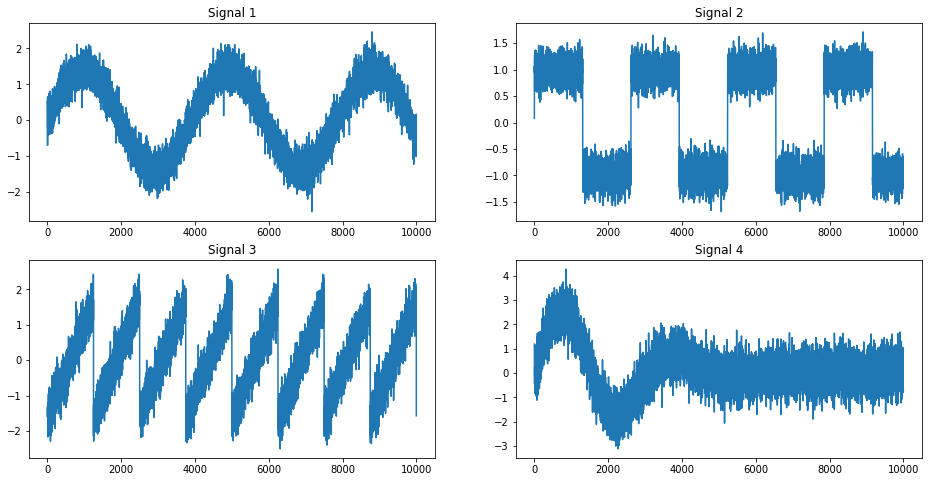

In [3]:
f, axs = plt.subplots(2, 2, figsize=(16,8))

axs[0,0].plot(signals['time'], signals[signals.columns[1]])
axs[0,0].set_title('Signal 1')
axs[0,1].plot(signals['time'], signals[signals.columns[2]])
axs[0,1].set_title('Signal 2')
axs[1,0].plot(signals['time'], signals[signals.columns[3]])
axs[1,0].set_title('Signal 3')
axs[1,1].plot(signals['time'], signals[signals.columns[4]])
axs[1,1].set_title('Signal 4')

plt.show()

Faktycznie widać tutaj na pierwszy rzut oka że coś z sygnałem 4 jest nie tak - jest dużo bardziej nieregularny niż reszta syngałów.

  ### FastICA

"Naprawimy" sygnały za pomocą FastICA

In [4]:
ica = FastICA(n_components=4, random_state=0)
signals_ica = ica.fit_transform(signals[signals.columns[1:5]])
orig_signals=pd.DataFrame(signals_ica)

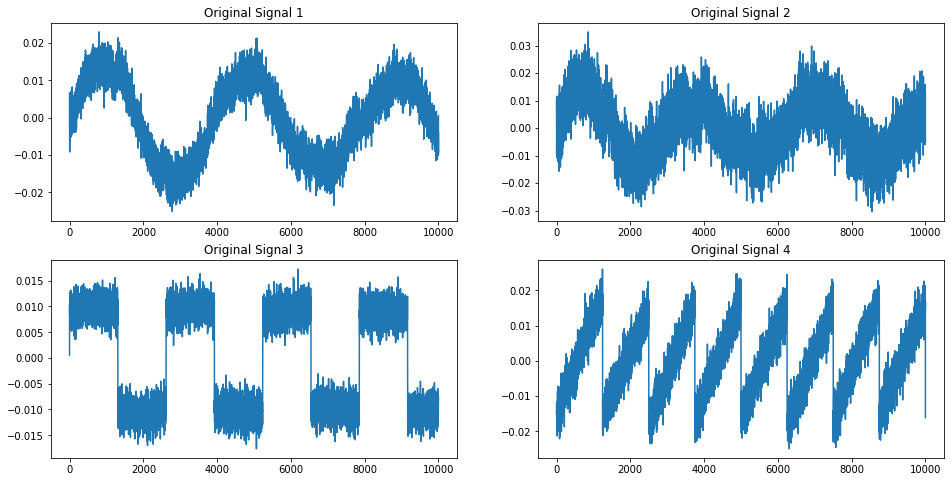

In [5]:
orig_signals.columns = ['orig_sig1', 'orig_sig2', 'orig_sig3', 'orig_sig4']

f, axs = plt.subplots(2, 2, figsize=(16,8))

orig_cols=orig_signals.columns
axs[0,0].plot(signals['time'], orig_signals[orig_cols[0]])
axs[0,0].set_title('Original Signal 1')
axs[0,1].plot(signals['time'], orig_signals[orig_cols[1]])
axs[0,1].set_title('Original Signal 2')
axs[1,0].plot(signals['time'], orig_signals[orig_cols[2]])
axs[1,0].set_title('Original Signal 3')
axs[1,1].plot(signals['time'], orig_signals[orig_cols[3]])
axs[1,1].set_title('Original Signal 4')


plt.show()

Jak widać został "naprawiony" sygnał 4 który tutaj jest jako orginalny sygnał 2. Sygnał 2 stał się oryginalnym sygnałem 3 a syngał 3 oryginalnym sygnałem 4.